# Start


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from skimage import  io
from skimage.color import rgb2gray
from skimage.transform import  resize
from utils import *
from haar_like_features import * 
from sklearn.metrics import roc_auc_score
from skimage.feature import draw_haar_like_feature
%matplotlib inline
%load_ext autoreload
%autoreload 2

## getting features map


In [23]:
haar = HaarLikeFeatures()
utils = Utils()
features_values = haar.extract_features_as_labels(0, 0, 19, 19)
classifiers = []
classifiers.append(utils.load_pickle('./models/adaboost/adaboost_1.pkl'))
classifiers.append(utils.load_pickle('./models/adaboost/adaboost_3.pkl'))
classifiers.append(utils.load_pickle('./models/adaboost/adaboost_10.pkl'))
classifiers.append(utils.load_pickle('./models/adaboost/adaboost_50.pkl'))

In [24]:
selected_features_labels = [i.feature_importances_ for i in classifiers]
selected_features_labels = [np.where(np.array(i) > 0) for i in selected_features_labels]
selected_features_labels

[(array([930], dtype=int64),),
 (array([1167, 1568, 1949], dtype=int64),),
 (array([  24,  100, 1475, 1568, 1614, 1827, 1921, 1959, 5503, 5680],
        dtype=int64),),
 (array([   0,   42,   58,   73,  142,  143,  227,  254,  423,  434,  509,
          930, 1161, 1242, 1250, 1332, 1487, 1499, 1639, 1640, 1642, 1649,
         1663, 1667, 1740, 1850, 1853, 1999, 2099, 2224, 2237, 2331, 2410,
         3962, 5104, 5171, 5250, 5344, 5395, 5487, 5493, 5505, 5506, 5574,
         5667, 5892, 6006, 6049], dtype=int64),)]

In [25]:
selected_features = [features_values[i] for i in selected_features_labels]
selected_features

[array([[ 0.,  3., 14.,  8.,  4.]]),
 array([[ 0.,  7.,  2., 10.,  5.],
        [ 1.,  5.,  8.,  1.,  2.],
        [ 1.,  8.,  9.,  2.,  4.]]),
 array([[ 0.,  1.,  5.,  2.,  1.],
        [ 0.,  5.,  5.,  2.,  1.],
        [ 1.,  0.,  5.,  1.,  2.],
        [ 1.,  5.,  8.,  1.,  2.],
        [ 1.,  8.,  0.,  1.,  2.],
        [ 1.,  0., 15.,  2.,  4.],
        [ 1.,  6., 13.,  2.,  4.],
        [ 1.,  9.,  3.,  2.,  4.],
        [ 4., 15., 13.,  4.,  4.],
        [ 4., 12.,  6.,  6.,  6.]]),
 array([[ 0.,  0.,  0.,  2.,  1.],
        [ 0.,  2.,  4.,  2.,  1.],
        [ 0.,  3.,  1.,  2.,  1.],
        [ 0.,  3., 16.,  2.,  1.],
        [ 0.,  7.,  9.,  2.,  1.],
        [ 0.,  7., 10.,  2.,  1.],
        [ 0., 11., 18.,  2.,  1.],
        [ 0., 13.,  7.,  2.,  1.],
        [ 0.,  4.,  9.,  4.,  2.],
        [ 0.,  5.,  2.,  4.,  2.],
        [ 0.,  9.,  5.,  4.,  2.],
        [ 0.,  3., 14.,  8.,  4.],
        [ 0.,  6., 11., 10.,  5.],
        [ 0.,  2.,  4., 12.,  6.],
        [ 0., 

In [26]:
from PIL import Image
from skimage import  io
from skimage.util import img_as_int

In [27]:
window_size = 19


haar = HaarLikeFeatures()
def is_face(img, layer_idx):
    img = resize(img, (window_size, window_size))
    feat = haar.get_feautures_result(img, selected_features[layer_idx])
    feat_in = np.zeros(( 6066))
    feat_in[selected_features_labels[layer_idx]] = feat
    pred = classifiers[layer_idx].predict(feat_in.reshape(1, -1))
    return pred[0]


In [28]:
img = Image.open('./Images/solvay-conference.jpg')
img.thumbnail((384, 288),)
img = np.array(img)



In [32]:
def test_image(imgP):
    img_arr = np.array(imgP)
    img_arr = rgb2gray(img_arr)
    img_arr = img_as_int(img_arr)
    img = np.array(imgP)
    for k in range(19, 24):
        for i in range(0, img_arr.shape[0] - k, 10):
            for j in range(0, img_arr.shape[1] - k, 10):
                imga = img_arr[i:i+k, j:j+k]
                for l in range(len(classifiers)):
                    if is_face(imga, l):
                        print("yes @ ", l)
                        img[i:i+k, j] = [255, 0, 0]
                        img[i:i+k, j+k] = [255, 0, 0]
                        img[i, j:j+k] = [255, 0, 0]
                        img[i+k, j:j+k] = [255, 0, 0]
                    else:
                        print("no @ ", l)

                # if(is_face(imga, 0)):
                #     print("yes 1")
                #     if(is_face(imga, 1)):
                #         print("yes 2")
                #         if(is_face(imga, 2)):
                #             print("face detected at: ", i, j)
                #             img[i:i+k, j] = [255, 0, 0]
                #             img[i:i+k, j+k] = [255, 0, 0]
                #             img[i, j:j+k] = [255, 0, 0]
                #             img[i+k, j:j+k] = [255, 0, 0]
                #             io.imshow(img)
                #             io.show()
                #             break
    return img
                    

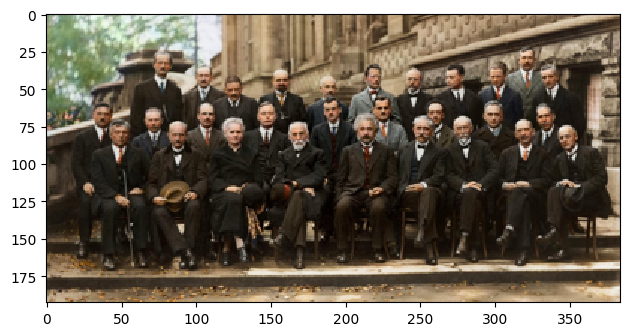

In [33]:
io.imshow(img)

In [34]:
img_res = test_image(img)

no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no @  1
no @  2
yes @  3
no @  0
no

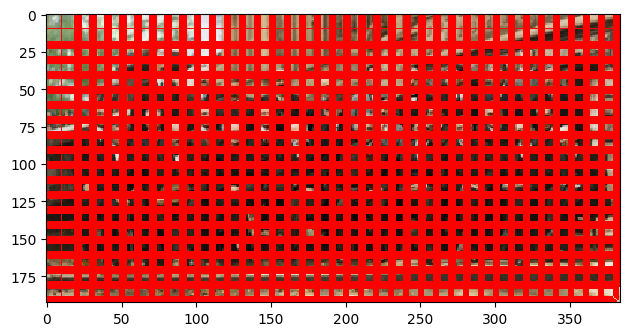

In [35]:
io.imshow(img_res)
io.show()

In [59]:
imgP = Image.open('./Images/messi.jpeg')
imgP = imgP.resize((imgP.size[0] // 4, imgP.size[1] // 4))

In [31]:
imgP.size

(270, 360)

In [32]:
a = test_image(imgP)

=========== start checking:  0 0 19
=========== start checking:  0 10 19
=========== start checking:  0 20 19
=========== start checking:  0 30 19
=========== start checking:  0 40 19
=========== start checking:  0 50 19
=========== start checking:  0 60 19
=========== start checking:  0 70 19
=========== start checking:  0 80 19
=========== start checking:  0 90 19
=========== start checking:  0 100 19
=========== start checking:  0 110 19
=========== start checking:  0 120 19
=========== start checking:  0 130 19
=========== start checking:  0 140 19
=========== start checking:  0 150 19
=========== start checking:  0 160 19
=========== start checking:  0 170 19
=========== start checking:  0 180 19
=========== start checking:  0 190 19
=========== start checking:  0 200 19
=========== start checking:  0 210 19
=========== start checking:  0 220 19
=========== start checking:  0 230 19
=========== start checking:  0 240 19
=========== start checking:  0 250 19
=========== start check

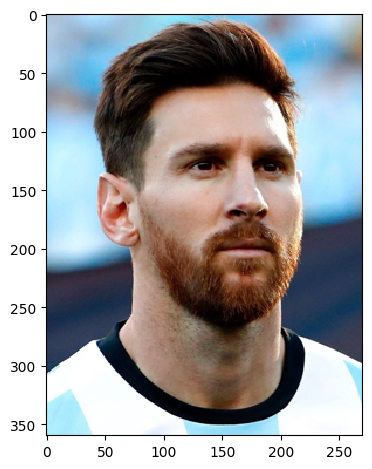

In [33]:
io.imshow(a)
io.show()